In [1]:
from tensorflow import keras

In [2]:
(train_images, train_targets), (test_images, test_targets) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
train_scaled = train_images / 255.0
test_scaled = test_images / 255.0

In [4]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_targets,
                                                                      test_size=0.2, random_state=0)

In [5]:
# 완전 연결 신경망 모델 생성하기
from keras import models, layers

def make_fc_model():
  model = models.Sequential()
  model.add(layers.Flatten(input_shape=(28, 28)))
  model.add(layers.Dense(1000, activation='relu'))
  model.add(layers.Dropout(0.3))
  model.add(layers.Dense(300, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  
  model.compile(loss='sparse_categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
  
  return model

In [6]:
fc_model = make_fc_model()
fc_model.summary()  # Layer와 학습 파라미터 개수 확인하기

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1000)              785000    
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_1 (Dense)             (None, 300)               300300    
                                                                 
 dense_2 (Dense)             (None, 10)                3010      
                                                                 
Total params: 1,088,310
Trainable params: 1,088,310
Non-trainable params: 0
_________________________________________________________________


In [7]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-fc-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = fc_model.fit(train_scaled, train_target, epochs=10,
                       validation_data=(val_scaled, val_target),
                       callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/10
1500/1500 [==============================] - 9s 4ms/step - loss: 0.2259 - accuracy: 0.9303 - val_loss: 0.1099 - val_accuracy: 0.9658
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1145 - accuracy: 0.9651 - val_loss: 0.0931 - val_accuracy: 0.9722
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0858 - accuracy: 0.9733 - val_loss: 0.0839 - val_accuracy: 0.9744
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0703 - accuracy: 0.9776 - val_loss: 0.0862 - val_accuracy: 0.9739
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0597 - accuracy: 0.9818 - val_loss: 0.1063 - val_accuracy: 0.9700


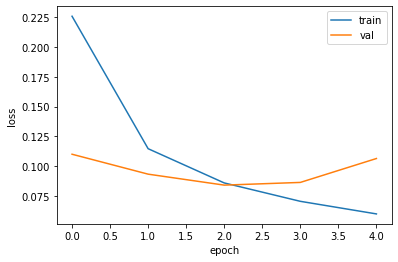

In [8]:
import matplotlib.pyplot as plt

def make_plot():
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['train', 'val'])
  plt.show()

make_plot()

In [9]:
fc_model.evaluate(test_scaled, test_targets)

313/313 [==============================] - 1s 4ms/step - loss: 0.0774 - accuracy: 0.9765


[0.07739727199077606, 0.9764999747276306]

CNN

In [10]:
# 합성곱 신경망 모델 생성하기
def make_cnn_model():
  model = models.Sequential([
    layers.Conv2D(10,  # 필터 개수
                  kernel_size=(5, 5),  # 입력데이터의 채널로 맞춰줌 (5, 5, 1)
                  padding='same',
                  activation='relu',
                  input_shape=(28, 28, 1)),  # (높이, 너비, 채널)
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(20, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
  ])

  model.compile(loss='sparse_categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
  
  return model

In [11]:
cnn_model = make_cnn_model()
cnn_model.summary()  # Layer와 학습 파라미터 개수 확인하기

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 10)        260       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 10)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 20)        1820      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 20)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 20)          0         
                                                                 
 flatten_1 (Flatten)         (None, 980)              

In [12]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
history = cnn_model.fit(train_scaled, train_target, epochs=10,
                        validation_data=(val_scaled, val_target),
                        callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/10
1500/1500 [==============================] - 18s 5ms/step - loss: 0.1641 - accuracy: 0.9483 - val_loss: 0.0561 - val_accuracy: 0.9827
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0706 - accuracy: 0.9777 - val_loss: 0.0402 - val_accuracy: 0.9870
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0508 - accuracy: 0.9843 - val_loss: 0.0316 - val_accuracy: 0.9907
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0401 - accuracy: 0.9872 - val_loss: 0.0323 - val_accuracy: 0.9899
Epoch 5/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0360 - accuracy: 0.9884 - val_loss: 0.0337 - val_accuracy: 0.9894


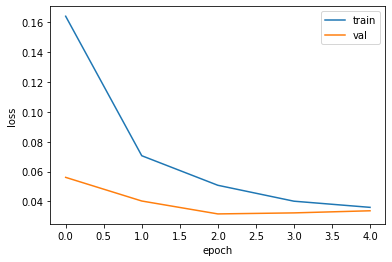

In [13]:
make_plot()

In [14]:
cnn_model.evaluate(test_scaled, test_targets)

313/313 [==============================] - 1s 4ms/step - loss: 0.0266 - accuracy: 0.9906


[0.026553332805633545, 0.9905999898910522]

In [16]:
predicted_result = cnn_model.predict(test_scaled)
predicted_result[:5]

array([[2.2862817e-08, 1.1295966e-07, 1.2195608e-06, 2.1238789e-06,
        1.3499337e-09, 8.0101231e-10, 1.9526941e-12, 9.9999607e-01,
        1.4506514e-08, 4.3306079e-07],
       [3.4398050e-07, 3.3514269e-05, 9.9996471e-01, 4.5069179e-09,
        8.5889846e-09, 2.4393157e-10, 1.0196073e-06, 4.0870978e-09,
        3.1934584e-07, 4.7047211e-10],
       [3.9134661e-06, 9.9995041e-01, 1.4388904e-06, 5.6871402e-10,
        1.0089479e-06, 2.9496971e-07, 9.3541854e-07, 3.7840600e-05,
        4.0364539e-06, 7.6612011e-08],
       [9.9973828e-01, 2.2368633e-07, 1.9560691e-06, 1.5821043e-06,
        1.8478972e-06, 2.4279082e-06, 2.2006566e-04, 5.5956122e-07,
        7.7855639e-06, 2.5229630e-05],
       [3.1436009e-06, 7.5069941e-08, 6.0021517e-07, 2.9786413e-08,
        9.9988234e-01, 4.8071254e-08, 1.7342303e-07, 3.7014738e-07,
        7.3745537e-07, 1.1249196e-04]], dtype=float32)

In [17]:
import numpy as np
predicted_labels = np.argmax(predicted_result, axis=1)  # 최대값의 index를 리턴
predicted_labels[:5]

array([7, 2, 1, 0, 4])

In [18]:
# 예측이 틀린 데이터 담기
wrong_result = []
for i in range(len(test_scaled)):
  if predicted_labels[i] != test_targets[i]:
    wrong_result.append(i)
print(len(wrong_result))

94


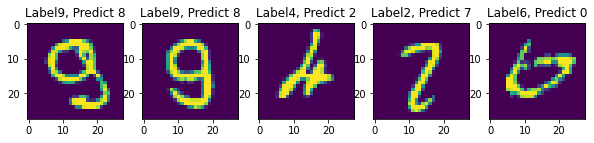

In [19]:
plt.figure(figsize=(10, 10))
for idx, wrong_idx in enumerate(wrong_result[:5]):  # 리스트의 (index, data) 리턴
  plt.subplot(1, 5, idx+1)
  plt.imshow(test_images[wrong_idx])
  plt.title('Label' + str(test_targets[wrong_idx]) + ', Predict ' + str(predicted_labels[wrong_idx]))
plt.show()